In [1]:
import warnings
warnings.simplefilter(action='ignore')

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1. 数据预处理

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
x_train_flatten = x_train.reshape(60000, 784).astype('float32')
x_test_flatten = x_test.reshape(10000, 784).astype('float32')

In [5]:
x_train_normalize = x_train_flatten / 255.0
x_test_normalize = x_test_flatten / 255.0

In [6]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train)
y_test_one_hot = tf.keras.utils.to_categorical(y_test)

### 2. 建立模型

#### 2.1 建立 Sequential 模型

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1000, input_dim=784, kernel_initializer='normal', activation='relu'),  # 输入层-隐藏层1(这里隐藏层为1000个神经元)
    tf.keras.layers.Dropout(0.5),  # 添加 Dropout 层
    
    tf.keras.layers.Dense(units=1000, kernel_initializer='normal', activation='relu'),  # 隐藏层2
    tf.keras.layers.Dropout(0.5),  # 添加 Dropout 层
    
    tf.keras.layers.Dense(units=10, kernel_initializer='normal', activation='softmax')  # 输出层
])

#### 2.2 查看模型的摘要

In [8]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              785000    
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


### 3. 训练模型

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
train_history = model.fit(x=x_train_normalize, y=y_train_one_hot, validation_split=0.2,
                         epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 14s - loss: 14.5478 - acc: 0.0972 - val_loss: 14.0516 - val_acc: 0.1281
Epoch 2/10
 - 13s - loss: 14.3233 - acc: 0.1112 - val_loss: 13.3720 - val_acc: 0.1703
Epoch 3/10
 - 13s - loss: 13.6706 - acc: 0.1517 - val_loss: 11.9744 - val_acc: 0.2568
Epoch 4/10
 - 13s - loss: 13.1267 - acc: 0.1855 - val_loss: 11.8225 - val_acc: 0.2664
Epoch 5/10
 - 13s - loss: 12.7852 - acc: 0.2066 - val_loss: 11.4733 - val_acc: 0.2880
Epoch 6/10
 - 13s - loss: 12.3000 - acc: 0.2368 - val_loss: 11.0556 - val_acc: 0.3139
Epoch 7/10
 - 13s - loss: 11.9510 - acc: 0.2584 - val_loss: 10.4957 - val_acc: 0.3487
Epoch 8/10
 - 13s - loss: 11.7794 - acc: 0.2690 - val_loss: 10.4822 - val_acc: 0.3494
Epoch 9/10
 - 13s - loss: 11.4918 - acc: 0.2868 - val_loss: 9.3157 - val_acc: 0.4219
Epoch 10/10
 - 13s - loss: 11.0558 - acc: 0.3139 - val_loss: 8.8860 - val_acc: 0.4486


### 4. 以图形显示训练过程

In [11]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel(train)
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

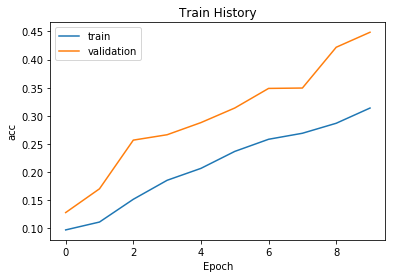

In [12]:
show_train_history(train_history, 'acc', 'val_acc')

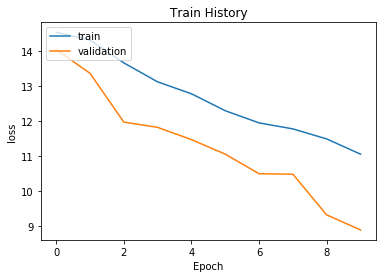

In [13]:
show_train_history(train_history, 'loss', 'val_loss')

### 5. 评估模型的准确率

In [14]:
scores = model.evaluate(x_test_normalize, y_test_one_hot)
print()
print('accuracy:', scores[1])

10000/10000 [==============================] - 2s 175us/step

accuracy: 0.4512


### 6. 进行预测

#### 6.1 执行预测

In [15]:
predictions = model.predict_classes(x_test_normalize)

#### 6.2 预测结果

In [16]:
predictions

array([9, 2, 1, ..., 9, 1, 6])

#### 6.3 定义函数以显示10项预测结果

In [17]:
def plot_images_labels_prediction(images, labels, predictions, idx, num=10):
    """
    images: 数字图像数组
    labels: 真实值数组
    predictions: 预测结果数据
    idx: 开始显示的数据index
    num: 要显示的数据项数, 默认为10, 不超过25
    """
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25:
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap='binary')
        title = 'lable=' + str(labels[idx])
        if len(predictions) > 0:
            title += ',predict=' + str(predictions[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

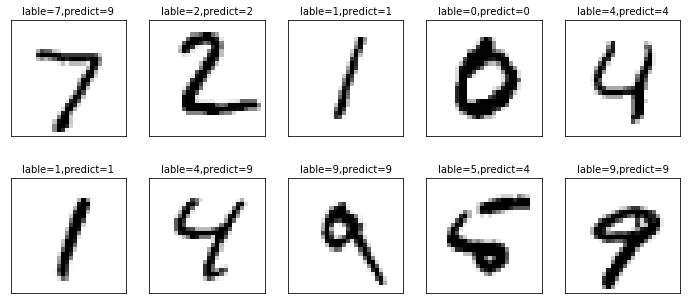

In [18]:
plot_images_labels_prediction(x_test, y_test, predictions, idx=0, num=10)

### 7. 显示混淆矩阵

#### 7.1 建立混淆矩阵

In [19]:
pd.crosstab(y_test, predictions, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,6,8,9
label,,,,,,,,
0,727,1,3,0,211,38,0,0
1,0,1119,4,0,4,5,0,3
2,25,96,615,1,238,48,0,9
3,241,154,148,13,270,22,0,162
4,1,26,2,0,668,55,0,230
5,189,54,11,0,361,114,0,163
6,30,12,64,0,166,686,0,0
7,12,105,43,0,192,3,0,673
8,54,156,94,1,436,105,1,127


#### 7.2 建立真实值与预测 DataFrame

In [20]:
df = pd.DataFrame({'label': y_test, 'predict': predictions})
df[:2]

,label,predict
0,7,9
1,2,2


#### 7.3 查询真实值是 "5" 但预测值是 "2" 的数据

In [21]:
df[(df.label==5)&(df.predict==2)]

,label,predict
289,5,2
1235,5,2
1737,5,2
2214,5,2
2224,5,2
2237,5,2
2556,5,2
3414,5,2
3558,5,2
3893,5,2


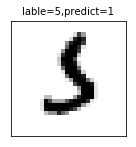

In [22]:
plot_images_labels_prediction(x_test, y_test, predictions, idx=340, num=1)

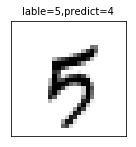

In [23]:
plot_images_labels_prediction(x_test, y_test, predictions, idx=1289, num=1)